# HW 2: Alcohol consumption
Group 39 - BEN BELHASSEN Mohamed Ali, CIAMPANA Lorenzo, FILESI Gianluca, NUBE Giacomo

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [18]:
df = pd.read_excel('Sleep_AU.xlsx')
df

,AU,SleepDuration,SleepRecovery
0,8.8840,484,36
1,2.7480,478,64
2,1.9008,497,66
3,5.5440,531,61
4,5.9400,515,63
...,...,...,...
72,3.1680,474,61
73,5.2320,485,40
74,9.0000,466,31
75,6.0720,464,52


## (1.a) Setting up the Linear Regression Model

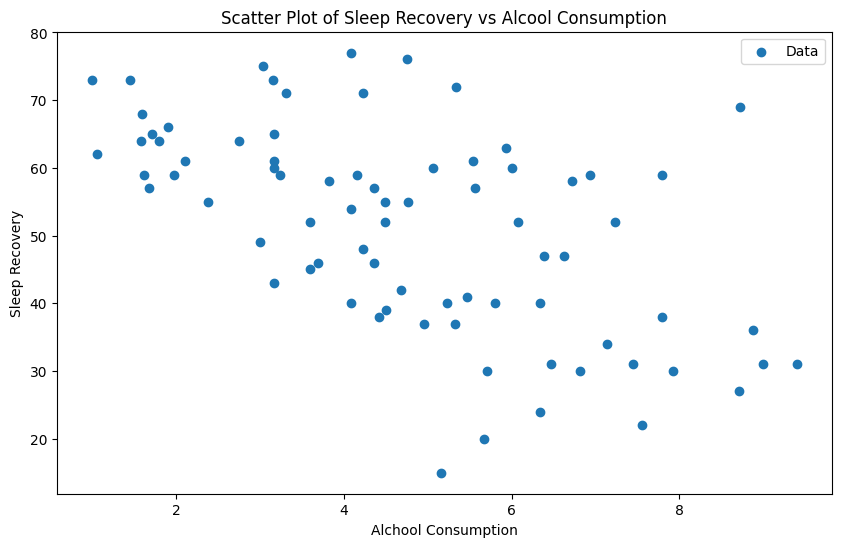

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df['AU'], df['SleepRecovery'], label='Data')
plt.xlabel('Alchool Consumption')
plt.ylabel('Sleep Recovery')
plt.title('Scatter Plot of Sleep Recovery vs Alcool Consumption')
plt.legend()
plt.show()

The two variables might be linearly related.

We are using Ordinary Least Squares (OLS) regression to model the relationship between Alcohol Consumption (AU) as the independent variable and Sleep Recovery as the dependent variable.

Before fitting the model, we add a constant term to account for the intercept, allowing for flexibility in the regression line not passing through the origin.

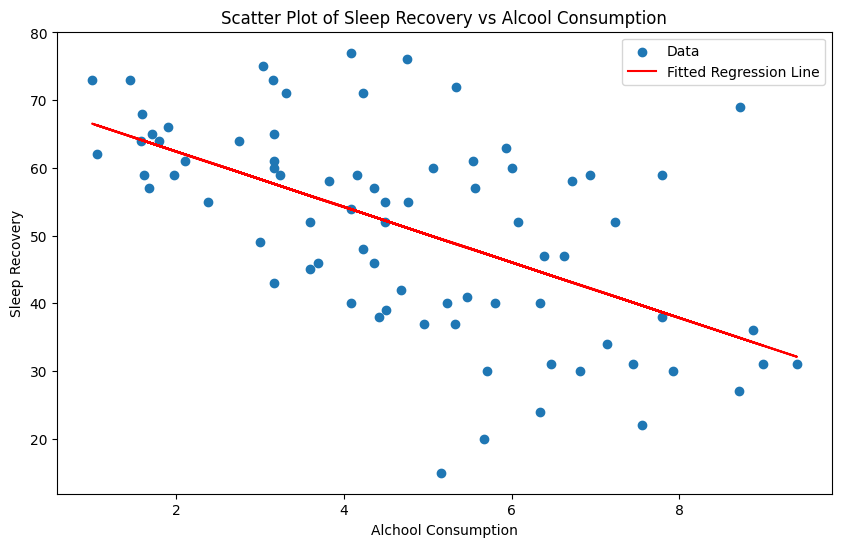

In [20]:
X1 = sm.add_constant(df['AU'])
Y1 = df['SleepRecovery']

model1 = sm.OLS(Y1, X1).fit()
df['Fitted_values_model1'] = model1.predict(X1)

plt.figure(figsize=(10, 6))
plt.scatter(df['AU'], df['SleepRecovery'], label='Data')
plt.plot(df['AU'], df['Fitted_values_model1'], color='red', label='Fitted Regression Line')
plt.xlabel('Alchool Consumption')
plt.ylabel('Sleep Recovery')
plt.title('Scatter Plot of Sleep Recovery vs Alcool Consumption')
plt.legend()
plt.show()

This scatter plot visualizes the relationship between Alcohol Consumption and Sleep Recovery. The red line represents the fitted regression line, showing the predicted Sleep Recovery values based on the linear model.


## (1.b)

In [21]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SleepRecovery   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     36.75
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           5.00e-08
Time:                        16:48:05   Log-Likelihood:                -302.46
No. Observations:                  77   AIC:                             608.9
Df Residuals:                      75   BIC:                             613.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.6226      3.515     20.092      0.000      63.621      77.625
AU            -4.0950      0.676     -6.062      0.000      -5.441      -2.749
==============================================================================
Omnibus:                        0.958   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.619   Jarque-Bera (JB):                0.451
Skew:                           0.127   Prob(JB):                        0.798
Kurtosis:                       3.275   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
slope_AU = model1.params   
print('The estimate slope for the model 1:', str(round(slope_AU.iloc[1],3)))


The estimate slope for the model 1: -4.095


## (1.c)
Give the coefficient of determination for Model 1 and explain how it connects to the empirical correlation coefficient.

In [23]:
r2_model1 = model1.rsquared
print('Coefficient of determination of model 1: R2 = ' + str(round(r2_model1, 3)))

Coefficient of determination of model 1: R2 = 0.329


In simple linear regression (with one independent variable), the **correlation coefficient $r$** measures the strength and direction of the linear relationship between Alcohol Consumption and Sleep Recovery. The $R^2$ value is equal to the square of the correlation coefficient, representing the proportion of the variance in Sleep Recovery explained by Alcohol Consumption.

In [24]:
corr_model1 = np.corrcoef(df['AU'],df['SleepRecovery'])[0,1]
proof_corr = corr_model1**2
print('Our correlation coefficient: r =',str(round(corr_model1,3)))
print('r^2 = ',str(round(corr_model1**2,3)),' = R2')

Our correlation coefficient: r = -0.573
r^2 =  0.329  = R2


In this analysis, the correlation coefficient between AU and Sleep Recovery is $-0.573$, whose square is $0.329$, that corresponds to $R^2$.

## (1.d) 
For each additional beer with $1$ AU, the sleep recovery is expected to decrease by approximately $4.10$ units. This is derived directly from the slope of the model calculated before.

## (1.e) 
In this step we want to perform a hypothesis test to determine whether the slope ($\beta_1$) of the linear regression model, which represents the effect of alcohol consumption (AU) on sleep recovery, is significantly different from zero. 

The null hypothesis $H_0$ states that $\beta_1=0$, meaning that there is no effect in alcohol consumption on sleep recovery. The alternative hypothesis $H_A$ states instead that alcohol consumption does affect sleep recovery.

From the OLS regression output, the slope estimate is $-4.0950$ with a standard error of $0.676$. The t-statistic is $-6.062$. Since this value is large in absolute terms, it suggests that the slope coefficient is significantly different from zero, indicating that alcohol consumption (AU) has a significant effect on sleep recovery.
Also, the p-value is $0.000004$, which is much smaller than the significance level of $0.05$. For this reason, we should reject the null hypothesis.

## (2.a)

In Model 1, the regression only includes AU (Alcohol Unit) as an explanatory variable for predicting SleepRecovery. This could lead to a violation of the strict exogeneity assumption, which requires that the independent variable (AU) is uncorrelated with the error term. If there are other factors, like SleepDuration, that influence both AU and SleepRecovery, the model’s estimates might be biased because of omitted variable bias.

Model 2 adds SleepDuration as a second explanatory variable:
$$\text{SleepRecovery}_i = \beta_0 + \beta_1 \text{AU}_i + \beta_2 \text{SleepDuration}_i + \epsilon_i$$

By including SleepDuration, Model 2 controls for its effect on SleepRecovery. This helps isolate the true effect of AU on SleepRecovery, reducing the bias that could arise from leaving out a relevant variable.

As a matter of fact, the total non-alcohol consumption doesn’t mean that a person will have a better sleep recovery, as there are other important factors that affect sleep quality. One of these key factors is the SleepDuration (the total time spent sleeping).

This makes the estimates more reliable and fixes the potential violation of the strict exogeneity assumption in Model 1.




## (2.b)

In [25]:
X2 = df[['AU','SleepDuration']]
X2 = sm.add_constant(X2)
Y2 = df['SleepRecovery']

model2 = sm.OLS(Y2,X2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SleepRecovery   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     28.19
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           7.93e-10
Time:                        16:48:06   Log-Likelihood:                -296.00
No. Observations:                  77   AIC:                             598.0
Df Residuals:                      74   BIC:                             605.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            23.4660     13.240      1.772      0.080      -2.915      49.846
AU               -3.8569      0.629     -6.134      0.000      -5.110      -2.604
SleepDuration     0.0976      0.027      3.675      0.000       0.045       0.151
==============================================================================
Omnibus:                        1.707   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.426   Jarque-Bera (JB):                1.119
Skew:                           0.001   Prob(JB):                        0.571
Kurtosis:                       3.591   Cond. No.                     4.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
df['ln(SleepDuration)'] = np.log(df['SleepDuration'])
X3 = df[['AU','ln(SleepDuration)']]
X3 = sm.add_constant(X3)
Y3 = df['SleepRecovery']

model3 = sm.OLS(Y3,X3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SleepRecovery   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     28.90
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           5.31e-10
Time:                        16:48:06   Log-Likelihood:                -295.59
No. Observations:                  77   AIC:                             597.2
Df Residuals:                      74   BIC:                             604.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -224.3318     77.644     -2.889      0.005    -379.041     -69.622
AU                   -3.8201      0.626     -6.100      0.000      -5.068      -2.572
ln(SleepDuration)    47.7453     12.558      3.802      0.000      22.724      72.767
==============================================================================
Omnibus:                        1.799   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.407   Jarque-Bera (JB):                1.220
Skew:                          -0.018   Prob(JB):                        0.543
Kurtosis:                       3.616   Cond. No.                         478.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
print(model2.rsquared)
print(model3.rsquared)

0.43241084377168193
0.4385322926215568


In [28]:
print(model2.rsquared_adj)
print(model3.rsquared_adj)

0.4170705963060517
0.42335748971943676


Due to the fact that both $R^2$ and $R^2_{adj}$ in model 3 are bigger, model3 performs better. 

## (2.c)

In [29]:
model3.params.iloc[2]*0.01

0.4774526508278859

Thanks to Taylor's approximation, we know that when Sleep Duration increases by $1\%$, Sleep Recovery increases by $0.01\beta_2$. In this case, it will increase approximately by $0.48$.

For example:

In [30]:
AU = 1
SD = 8*60
SD1 = np.log(SD)
SD2 = np.log(SD*1.01)
OLD = model3.predict([1,AU,SD1])
NEW = model3.predict([1,AU,SD2])
NEW - OLD

array([0.47508118])

## (2.d)

In [31]:
beta1_hat = model3.params['AU']
beta1_hypothesis = -4
beta1_se = model3.bse['AU']

t_stat = (beta1_hat - beta1_hypothesis) / beta1_se
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=model3.df_resid))

print(f"p-value: {p_value}")

p-value: 0.7747064311990752


Since $p$-value is larger than $\alpha=0.05$, there is no statistically significant evidence to suggest that the coefficient for AU (alcohol consumption) is different from $-4$. In other words, the data does not provide strong enough evidence to conclude that the true effect of alcohol consumption on sleep recovery is different from $-4$.

## (2.e)

In [32]:
alpha = 0.01

stats.t.interval(1-alpha,loc=beta1_hat,scale=beta1_se,df=model3.df_resid)

(-5.475745323437121, -2.1644701354444553)